In [20]:
#20BHI10028 - TUSHAR MISRA
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree 
df = pd.read_csv("data3.csv")
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,city
0,313000.0,3,1.50,1340,7912,1.5,0,3,Shoreline
1,2384000.0,5,2.50,3650,9050,2.0,4,5,Seattle
2,342000.0,3,2.00,1930,11947,1.0,0,4,Kent
3,420000.0,3,2.25,2000,8030,1.0,0,4,Bellevue
4,550000.0,4,2.50,1940,10500,1.0,0,4,Redmond


In [21]:
df.drop(['view','city'],axis='columns', inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition
0,313000.0,3,1.50,1340,7912,1.5,3
1,2384000.0,5,2.50,3650,9050,2.0,5
2,342000.0,3,2.00,1930,11947,1.0,4
3,420000.0,3,2.25,2000,8030,1.0,4
4,550000.0,4,2.50,1940,10500,1.0,4


In [22]:
for x in df.index:
    if df.loc[x, "price"] > 550000.0:
        df.loc[x, "price"] = 1
    else:
        df.loc[x, "price"] = 0
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition
0,0.0,3,1.50,1340,7912,1.5,3
1,1.0,5,2.50,3650,9050,2.0,5
2,0.0,3,2.00,1930,11947,1.0,4
3,0.0,3,2.25,2000,8030,1.0,4
4,0.0,4,2.50,1940,10500,1.0,4


In [23]:
inputs=df.drop('price',axis='columns')
target=df['price']

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
model = SVC()

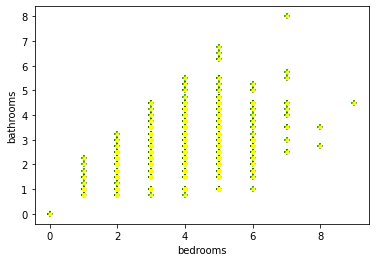

In [25]:
plt.xlabel('bedrooms')
plt.ylabel('bathrooms')
plt.scatter(df['bedrooms'], df['bathrooms'],color="green",marker='+')
plt.scatter(df['bedrooms'], df['bathrooms'],color="yellow",marker='.')


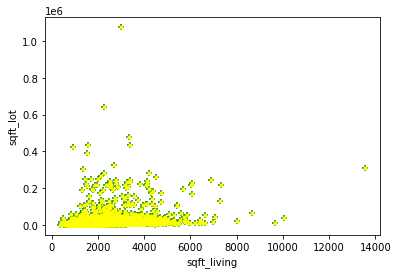

In [26]:
plt.xlabel('sqft_living')
plt.ylabel('sqft_lot')
plt.scatter(df['sqft_living'], df['sqft_lot'],color="green",marker='+')
plt.scatter(df['sqft_living'], df['sqft_lot'],color="yellow",marker='.')

In [27]:
import array as arr
scores=[]
i=0
t=[0.2,0.3,0.4,0.5,0.6,0.7,0.8]
for s in t:
    inputs_train, inputs_test, target_train, target_test = train_test_split(inputs, target, test_size=s)
    model.fit(inputs_train, target_train)
    prediction=model.predict(inputs_test)
    #accuracy using train test split
    print("Accuracy Score", accuracy_score(prediction,target_test)*100)
    scores.append(accuracy_score(prediction,target_test)*100)

Accuracy Score 73.26086956521739
Accuracy Score 73.40579710144928
Accuracy Score 69.40217391304347
Accuracy Score 66.47826086956522
Accuracy Score 71.6304347826087
Accuracy Score 65.27950310559007
Accuracy Score 65.46195652173913


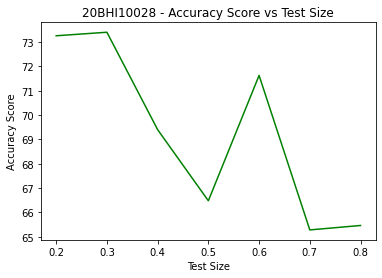

In [28]:
plt.plot(t, scores, color="green")
plt.ylabel("Accuracy Score")
plt.xlabel("Test Size")
plt.title("20BHI10028 - Accuracy Score vs Test Size")
plt.show()